In [29]:
import pandas as pd
# web scrape state political affiliations
import urllib.request
from bs4 import BeautifulSoup

In [30]:
#cleaning data and merging 
covid = pd.read_csv("COVID19-death-US.csv", parse_dates = ['date'])
overall = pd.read_csv('overall.csv', parse_dates = ['post_date'])
result = covid.merge(overall, how='left', left_on='date', right_on='post_date')
result2 = covid.merge(overall, left_on='date', right_on='post_date')

#reading in industry, geography and job_family
industry = pd.read_csv('industry.csv', parse_dates = ['post_date'])
jobfam = pd.read_csv('job_family.csv', parse_dates = ['post_date'])
geo = pd.read_csv('geography.csv', parse_dates = ['post_date'])

In [31]:
url = "https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states"

page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables = soup.find_all("table")
right_table = soup.find_all('table', class_ = "sortable wikitable")

In [32]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []

for row in right_table[0].findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 9:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[4].find(text = True))
        F.append(cells[5].find(text = True))
        G.append(cells[6].find(text = True))
        H.append(cells[7].find(text = True))
        I.append(cells[8].find(text = True))
    elif len(cells) == 8:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[3].find(text = True))
        F.append(cells[4].find(text = True))
        G.append(cells[5].find(text = True))
        H.append(cells[6].find(text = True))
        I.append(cells[7].find(text = True))

In [33]:
df = pd.DataFrame(A, columns = ['State'])
df['2020 presidential election'] = list(map(str.strip, B))
df['Governor'] = list(map(str.strip, C))
df['State Senate'] = list(map(str.strip, D))
df['State House'] = list(map(str.strip, E))
df['Senior U.S. Senator'] = list(map(str.strip, F))
df['Junior U.S. Senator'] = list(map(str.strip, G))
df['U.S. House of Reprsentatives'] = list(map(str.strip, H))
df['party registration'] = list(map(str.strip, I))

In [34]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

df['State Abbreviation'] = states

In [35]:
df.head()

,State,2020 presidential election,Governor,State Senate,State House,Senior U.S. Senator,Junior U.S. Senator,U.S. House of Reprsentatives,party registration,State Abbreviation
0,Alabama,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican,AL
1,Alaska,Republican,Republican,Republican 13–7,Coalition 23–17,Republican,Republican,Republican,Republican,AK
2,Arizona,Democratic,Republican,Republican 16–14,Republican 31–29,Democratic,Democratic,Democratic 5–4,Republican,AZ
3,Arkansas,Republican,Republican,Republican 28–7,Republican 77–23,Republican,Republican,Republican 4,Republican,AR
4,California,Democratic,Democratic,Democratic 31–9,Democratic 59–19–1,Democratic,Democratic,Democratic 42–11,Democratic,CA


In [36]:
state_party = df[['State Abbreviation', 'Governor']]
state_party.head()

,State Abbreviation,Governor
0,AL,Republican
1,AK,Republican
2,AZ,Republican
3,AR,Republican
4,CA,Democratic


In [37]:
geo.head()

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,AK,1.0
2,2020-03-01,AL,1.0
3,2020-03-01,AR,1.0
4,2020-03-01,AZ,1.0


In [38]:
geo_party = state_party.merge(geo, right_on = 'state', left_on = 'State Abbreviation')

In [39]:
clean_geo = geo_party.drop(columns = ['State Abbreviation'])

In [40]:
clean_geo.head()

,Governor,post_date,state,count_id_indexed
0,Republican,2020-03-01,AL,1.0000
1,Republican,2020-03-02,AL,1.0065
2,Republican,2020-03-03,AL,1.0451
3,Republican,2020-03-04,AL,1.0885
4,Republican,2020-03-05,AL,1.0865


In [41]:
#taking the average count_id_indexed for democratic and republican states
groups = clean_geo.drop(columns=['state']).groupby(['post_date', 'Governor']).mean()
groups.head()

count_id_indexed
post_date  Governor                    
2020-03-01 Democratic          1.000000
           Republican          1.000000
2020-03-02 Democratic          1.017613
           Republican          1.012985
2020-03-03 Democratic          1.043513

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

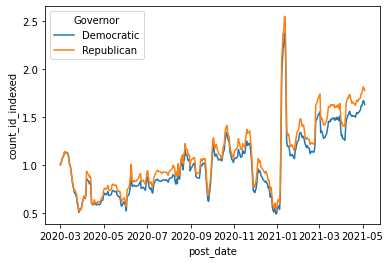

In [42]:
#plot comparing new job listing averages of Democratic and Republican states.

import seaborn as sns
sns.lineplot(x='post_date', y='count_id_indexed', hue='Governor', data=groups)

<AxesSubplot:xlabel='date'>

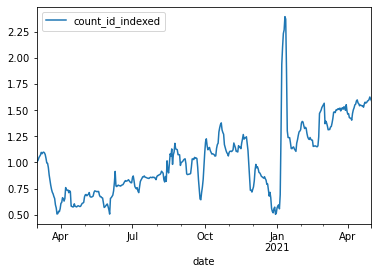

In [50]:
#overall hiring trend
result2.plot.line(x='date', y='count_id_indexed')

/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-55-ad79872ffb42>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.0, 0, ''),
 Text(50.0, 0, '2020-04-19'),
 Text(100.0, 0, '2020-06-08'),
 Text(150.0, 0, '2020-07-28'),
 Text(200.0, 0, '2020-09-16'),
 Text(250.0, 0, '2020-11-05'),
 Text(300.0, 0, '2020-12-25'),
 Text(350.0, 0, '2021-02-13'),
 Text(400.0, 0, '2021-04-04'),
 Text(450.0, 0, '')]

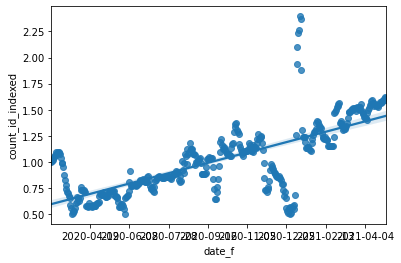

In [55]:
%matplotlib inline
temp = result2.sort_values('date')
temp['date_f'] = pd.factorize(temp['date'])[0] + 1
mapping = dict(zip(temp['date_f'], temp['date'].dt.date))

ax = sns.regplot('date_f', 'count_id_indexed', data=temp)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)

We notice that there is an overall linearly positive trend, except for the drop in January. We see that this rapid drop happens during the week before December 25 and 1 week after New Years.

In [56]:
#finding names of job_family
jobfam.head()

,post_date,job_family,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Customer Service,1.0
2,2020-03-01,Entertainment and Recreation,1.0
3,2020-03-01,Facilities/Constr,1.0
4,2020-03-01,Finance/Insurance,1.0


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

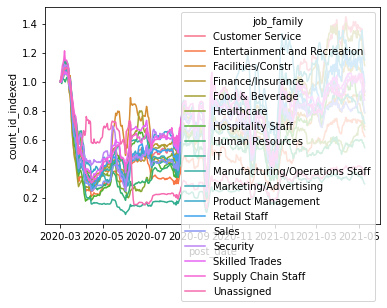

In [57]:
#plot of all families
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = jobfam)

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

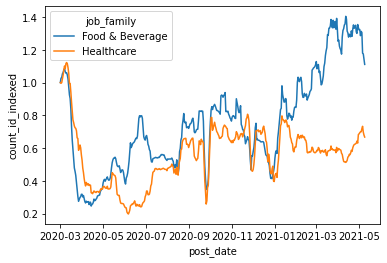

In [66]:
# plot comparing food and healthcare industries

wanted_cat = ['Healthcare', 'Food & Beverage']
subset = jobfam[jobfam['job_family'].isin(wanted_cat)]
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = subset)